## **Stable Diffusion with Diffusers**

https://huggingface.co/blog/stable_diffusion

In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00


In [2]:
import diffusers

ModuleNotFoundError: No module named 'diffusers'

In [3]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipe.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

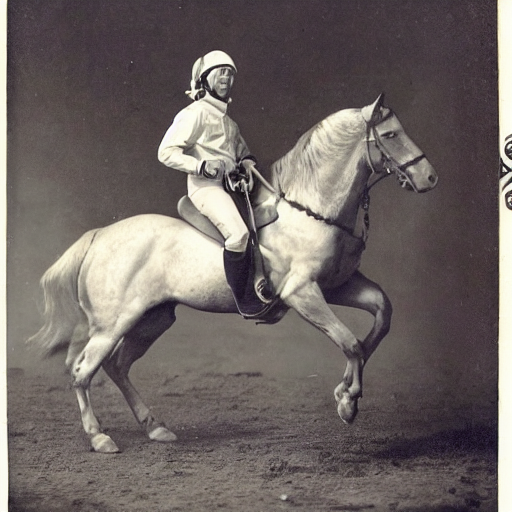

In [9]:
prompt = "a photograph of an astronuat riding a horse"

image = pipe(prompt).images[0]
image

# image_save(f"astronaut_rides_horse.png")로 이미지 저장 가능

위 코드는 실행할 때마다 항상 다른 이미지를 제공해줄 수 있음

In [6]:
result = pipe(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
print(result)

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FD5A2752410>], nsfw_content_detected=[False])


  0%|          | 0/50 [00:00<?, ?it/s]

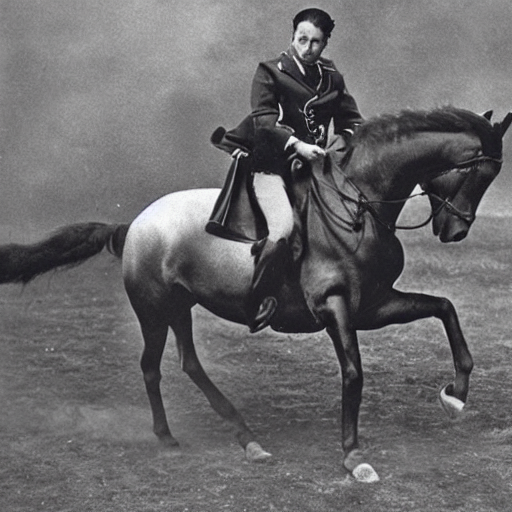

In [10]:
# random_seed, guidance_scale 추가

generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale = 7.5, generator = generator).images[0]
image

random seed로 generator를 pipeline에 전달할 수 있다. 동일한 시드를 가진 제너레이터를 사용할 때마다 동일한 이미지 출력을 얻을 수 있다.
- guidance_scale : SD 모델에서 입력 프롬프트에 얼마나 충실하게 반응할지 조정함. 높은 값으로 설정하면 모델이 입력 프롬프트의 내용을 더 강력하게 반영함.
  - 분류기 없는 안내라고도 불림
  - 이미지 품질이나 다양성을 희생하더라도 생성이 프롬프트와 더 잘 일치하도록 강제하는 것
  - 일반적으로 SD에서는 7 ~ 8.5 사이의 값 사용 (기본 7.5)
  - 매우 큰 값을 사용하면 이미지가 좋아보일수는 있으나 다양성이 떨어짐
  


  0%|          | 0/15 [00:00<?, ?it/s]

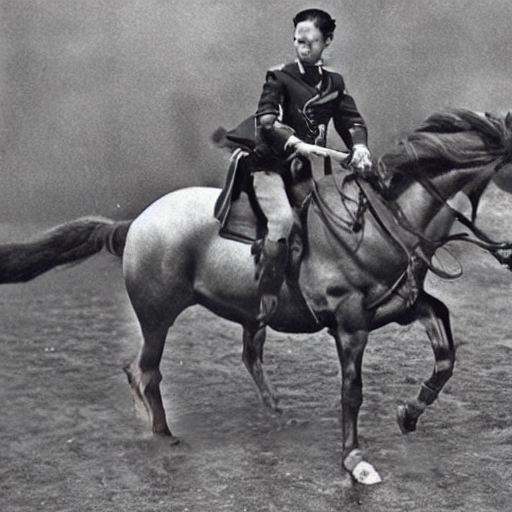

In [12]:
# num_inference_steps 조정

generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale = 7.5, num_inference_steps = 15, generator = generator).images[0]
image

- num_inference_steps : 추론 단계 수 변경 가능

일반적으로 더 많은 step을 사용할 수록 결과가 더 좋지만, 생성에 더 오랜 시간이 걸린다는 단점이 존재한다. SD는 비교적 적은 step에서도 잘 작동하므로 기본 inference_step 수인 50개를 사용하는 것이 좋다. <br>
더 빠른 결과를 원한다면 더 적은 수를 사용할 수 있고, 잠재적으로 더 높은 품질의 결과를 원한다면 더 큰 숫자를 사용할 수도 있다.

=> num_inference_steps = 15로 설정함으로써 노이즈 제거 단계를 15개만 사용해 생성 결과의 품질이 크게 저하되었음을 확인할 수 있다. (말의 형태, 얼굴 형태에서 차이 존재)


In [14]:
# 동일한 프롬프트의 이미지를 한 번에 여러개 생성하는 방법
# 이미지를 그리드 형태로 보기 좋게 시각화하는데 도움이 되는 image_grid 함수

from PIL import Image

def image_grid(imgs, rows, cols):
  assert len(imgs) == rows * cols
  # imgs 리스트 길이가 rows * cols 인지 확인 => 모든 격자 칸이 이미지로 채워질 수 있어야 함

  w, h = imgs[0].size # 첫 번째 이미지의 너비(w), 높이(h)
  grid = Image.new("RGB", size = (cols*w, rows*h)) # 새로운 이미지 "grid" 생성함
  grid_w, grid_h = grid.size # grid의 너비와 높이 가져옴

  for i, img in enumerate(imgs): # 리스트 반복하면서 각 이미지(img)와 그 인덱스(i) 가져옴
    grid.paste(img, box = (i%cols*w, i//cols*h)) # 각 이미지 적절한 위치에 붙임.
    # i%cols*w, i//cols*h: 각 이미지가 격자에서 위치할 열과 행 결정
  return grid

- imgs : 이미지 객체의 리스트
- rows : 생성될 이미지 격자 행 수
- cols : 생성될 이미지 격자 열 수

In [15]:
num_images = 3
prompt = ["a photograph of an astronaut riding a horse"] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

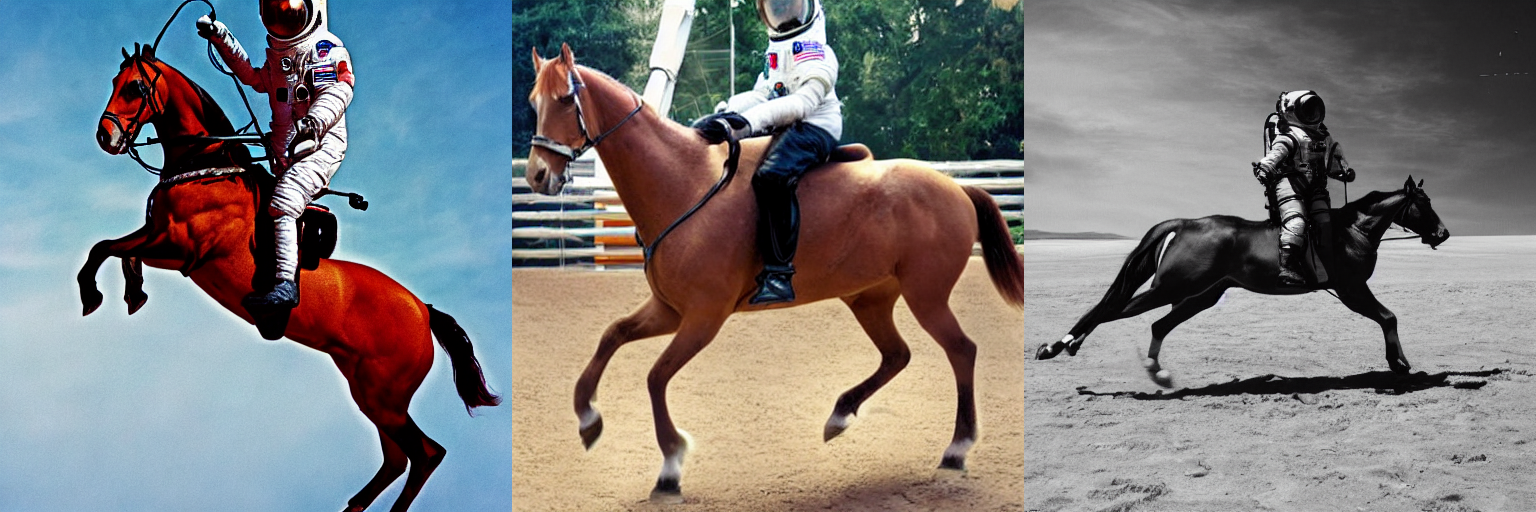

In [16]:
grid

기본적으로 SD는 512*512 픽셀의 이미지를 생성함

- 이미지 크기 선택에서 주의할 점
  - 높이와 너비가 모두 8의 배수인지 확인할 것
  - 512 미만이면 이미지 품질이 떨어질 수 있음
  - 양방향으로 512 초과 -> 이미지의 특정 부분 반복되어 나타남(추가 공간을 채우기 위해 이미지 일부가 반복적으로 사용됨) -> 전역 일관성 손실 발생
    - 전역 일관성 상실 : 이미지의 전박적인 일관성이나 연속성 손실됨
  - 정사각형이 아닌 이미지를 만드는 가장 좋은 방법은 한 차원에서는 512를 사용하고, 다른 차원에서는 그보다 큰 값을 사용하는 것
  


In [17]:
# 정사각형이 아닌 이미지 생성

prompt = "a photograph of an astronuat riding a horse"
image = pipe(prompt, height = 512, width = 768).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

## **사용자 정의 inference pipeline 만들기**

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNMLScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

In [1]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler(beta_start = 0.00085, beta_end=0.012,
                                 beta_schedule="scaled_linear", num_train_timesteps=1000)
# KLMS scheduler

ModuleNotFoundError: No module named 'diffusers'

In [ ]:
# GPU로 모델 보냄

torch_device = "cuda"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)

In [3]:
# 파라미터 정의

prompt = "a photo graph of an astronaut riding a horse"

height = 512
width = 512

num_inference_steps = 50

guidance_scale = 7.5

generator = torch.manual_seed(0)

batch_size = len(prompt)

NameError: name 'torch' is not defined

전달된 프롬프트에 대한 텍스트 임베딩을 가져온다. 이 임베딩은 unet 모델을 컨디셔닝하고 입력 프롬프트와 유사한 이미지 생성을 유도하는 데 사용된다.

In [ ]:
text_input = tokenizer(prompt, padding="max_length", max_length = tokenizer.model_max_length, truncation=True,
                       return_tensors = "pt")

text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0] # 조건부 임베딩

classifier-free guidance를 위해 패딩 토큰(빈 텍스트)를 위한 임베딩인 unconditional text emedding을 가져온다. 조건부 텍스트 임베딩과 동일한 모양이어야 한다.

In [ ]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer(
    [""] * batch_size, padding = "max_length", max_length = max_length, return_tensors = "pt"
)

uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0] # 무조건 임베딩

- input_ids : tokenizer를 통해 변환된 텍스트의 토큰 ID 배열을 나타냄. 이 배열의 길이는 모델이 처리할 수 있는 최대 텍스트 길이를 의미함

uncond_input
- [""] * batch_size : 빈 문자열의 리스트를 batch_size만큼 생성. 배치 처리를 위한 빈 입력을 만드는 것으로, 모델이 텍스트의 조건을 받지 않고 자유롭게 생성할 수 있도록 하는 "조건 없는" 입력을 생성함.
- tokenizer(...) : 빈 문자열들을 토크나이즈 함. 모델이 요구하는 입력 형식으로 변환
- padding = "max_length" : 모든 입력이 "max_length"와 같은 길이를 갖도록 패딩 추가
- return_tensor = "pt" : 반환된 데이터를 파이토치 텐서(pt)형식으로 변환하도록 지정

uncond_embeddings
- text_encoder(...) : CLIPTextModel을 사용해 입력 텍스트의 토큰ID를 임베딩 벡터로 변환함. 이때 텍스트 인코더는 입력 텍스트를 처리해 문맥에 맞는 임베딩 생성함

classifier-free guidance를 위해서 조건부 입력(text_embeddings)과 무조건 임베딩(uncond_embeddings)으로 두번의 포워드 패스를 수행해야 한다. <br>
실제로는 두 번의 포워드 패스를 수행하지 않기 위해 두 가지를 하나의 배치로 연결할 수 있다.


In [ ]:
# 조건부 임베딩과 무조건 임베딩 하나의 배치로 연결

text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

In [ ]:
# initial random noise 생성

latents = torch.randn(
    (batch_size, unet.in_channels, height // 8, width // 8),
    generator = generator,
)
latents = latents.to(torch_device)

- torch.randn() : 정규분포에서 무작위 샘플 생성해 latents 초기화
- unet.in_channels : unet 모델의 입력 채널 수
- height // 8, width // 8 : 원본 이미지의 높이와 너비를 8로 나눈 값. 이미지의 차원을 줄이기 위해 사용된 것임

이 단계에서 latents는 shape가 생성하려는 이미지보다 훨씬 작은 torch.Size([1, 4, 64, 64])인 것을 알 수 있다. 모델은 이 latents(순수 노이즈)를 나중에 512*512로 변환한다.


다음으로 아래와 같이 선택한 num_inference_steps로 스케줄러를 초기화한다. 이 과정을 통해 노이즈 제거 과정에서 사용할 시그마와 정확한 시간 단계 값이 계산된다.

In [ ]:
scheduler.set_timesteps(num_inference_steps)

# scheduler = KLMS scheduler

In [ ]:
latents = latents * scheduler.init_noise_sigma

In [ ]:
# denoising loop

from tqdm.auto import tqdm

scheduler.set_timesteps(num_inference_steps)

for t in tqdm(scheduler.timesteps):
  latent_model_input = torch.cat([latents]*2)
  latent_mode_input = scheduler.scale_model_input(latent_model_input, timestep = t)

  # predic the noise residual
  with torch.no_grad():
    noise_pred = unet(latent_model_input, t, encoder_hidden_states = text_embeddings).sample

  # perform guidance
  noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
  noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

  # compute the previous noisy sample x_t -> x_t-1
  latents = scheduler.step(noise_pred, t, latents).prev_sample

- tqdm : 반복 작업의 진행 상태를 시각적으로 보여주는 라이브러리
-torch.cat([latents]*2) : latents(잠재 공간의 변수들 나타냄) 두 배로 복제해 하나의 텐서로 결합함. 이는 조건부와 비조건부 생성 경로를 동시에 계산하기 위함임
- scheduler.scale_model_input(latent_model_input, timestep = t) : 스케줄러를 통해 잠재 모델 입력을 현재 시간 단계 t에 맞게 스케일 조정함.
- torch.no_grad() :  그라디언트 계산을 비활성화해 메모리 사용량 줄임
- unet(...) : UNet 구조의 생성 모델 실행함. "latent_model_input"과 "t"를 입력으로 해 "text_embedding"과 결합된 결과 생성함.
- .sample : 생성된 결과에서 샘플 추출함
- .chunk(2) : 생성된 노이즈를 조건부와 비조건부 component로 분할함
- scheduler.step(...) : 잠재 변수 업데이트함. 이 과정에서 noise_pred와 t를 사용해 다음 단계의 latents를 계산함
- prev.sample : 업데이트된 잠재 변수 추

In [ ]:
latents = 1 / 0.18215 * latents # 스케일 조정
with torch.no_grad() :
  image = vae.decode(latents).sample

In [ ]:
image = (image/2 + 0.5).clamp(0, 1)
image = image.detach().cpu.permute(0, 2, 3, 1).numpy()
images = (image * 225).round().astype("unit8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

- .clamp(0, 1) :  변환된 값이 [0, 1] 범위를 벗어나지 않도록 클리핑함. 이미지 데이터가 유효한 픽셀 값 범위 내에 있도록 보장함.
- image.detach() : 이미지 텐서를 현재 계산 그래프에서 분리해 그라디언트 계산에서 제외함. (메모리 요구를 줄이기 위해)
- .permute(0, 2, 3, 1) : 텐서의 차원 재배열함. 파이토치는 이미지를 [배치크기, 채널, 높이, 너비] 형식으로 처리하지만 넘파이와 PIL은 [배치크기, 높이, 너비, 채널] 형식을 사용하기 때문임.
- image * 225 : [0, 1] 범위의 픽셀 값을 [0, 225] 범위로 조정함. 8비트 정수 표현을 위함임
- Image.fromarray(image) : 넘파이 배열을 받아 PIL 이미지 객체를 생성함. 이미지를 파일로 저장하거나 표시하는 데 필요한 과정임